## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for batch in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %d" % (batch))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    # 使用 SGD
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-SGD-BatchSize-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 RMSProp
    optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-RMSprop-BatchSize-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 AdaGrad
    optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Adagrad-BatchSize-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 Adam
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Adam-BatchSize-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)      

50000/50000 [==============================] - 255s 5ms/step - loss: 0.5535 - acc: 0.8006 - val_loss: 1.8092 - val_acc: 0.5379
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 430s 9ms/step - loss: 3.6400 - acc: 0.0983 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 436s 9ms/step - loss: 2.3046 - acc: 0.0969 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 435s 9ms/step - loss: 2.1909 - acc: 0.1672 - val_loss: 2.1259 - val_acc: 0.2046
Epoch 4/50
50000/50000 [==============================] - 434s 9ms/step - loss: 2.0670 - acc: 0.2393 - val_loss: 2.0200 - val_acc: 0.2398
Epoch 5/50
50000/50000 [==============================] - 452s 9ms/step - loss: 2.0638 - acc: 0.2388 - val_loss: 2.0640 - val_acc: 0.1854
Epoch 6/50
50000/50000 [==============================] - 466s 9ms/step - loss: 2.0858 - acc: 0.2320 - val_loss: 2.0298 - val_acc: 0.

50000/50000 [==============================] - 367s 7ms/step - loss: 2.0568 - acc: 0.1798 - val_loss: 2.0649 - val_acc: 0.1791
Epoch 9/50
50000/50000 [==============================] - 368s 7ms/step - loss: 2.0563 - acc: 0.1798 - val_loss: 2.0630 - val_acc: 0.1789
Epoch 10/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.0557 - acc: 0.1800 - val_loss: 2.0645 - val_acc: 0.1790
Epoch 11/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.0548 - acc: 0.1803 - val_loss: 2.0640 - val_acc: 0.1792
Epoch 12/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.0544 - acc: 0.1802 - val_loss: 2.0633 - val_acc: 0.1791
Epoch 13/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.0541 - acc: 0.1803 - val_loss: 2.0622 - val_acc: 0.1794
Epoch 14/50
50000/50000 [==============================] - 367s 7ms/step - loss: 2.0535 - acc: 0.1803 - val_loss: 2.0616 - val_acc: 0.1797
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 548s 11ms/step - loss: 2.3032 - acc: 0.0981 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 549s 11ms/step - loss: 2.3032 - acc: 0.0993 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 548s 11ms/step - loss: 2.3032 - acc: 0.0984 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 548s 11ms/step - loss: 2.3032 - acc: 0.0999 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 549s 11ms/step - loss: 2.3031 - acc: 0.0988 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 548s 11ms/step - loss: 2.3032 - acc: 0.0982 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 549s 11ms/step - loss: 2.3031 - acc: 0.0997 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 23/50
50000/50000 [=======

50000/50000 [==============================] - 34s 689us/step - loss: 1.4100 - acc: 0.4973 - val_loss: 1.4777 - val_acc: 0.4695
Epoch 16/50
50000/50000 [==============================] - 34s 688us/step - loss: 1.3908 - acc: 0.5019 - val_loss: 1.4710 - val_acc: 0.4757
Epoch 17/50
50000/50000 [==============================] - 34s 686us/step - loss: 1.3732 - acc: 0.5092 - val_loss: 1.4295 - val_acc: 0.4865
Epoch 18/50
50000/50000 [==============================] - 34s 688us/step - loss: 1.3545 - acc: 0.5163 - val_loss: 1.4013 - val_acc: 0.4977
Epoch 19/50
50000/50000 [==============================] - 34s 686us/step - loss: 1.3411 - acc: 0.5202 - val_loss: 1.4135 - val_acc: 0.4976
Epoch 20/50
50000/50000 [==============================] - 35s 693us/step - loss: 1.3218 - acc: 0.5288 - val_loss: 1.4329 - val_acc: 0.4929
Epoch 21/50
50000/50000 [==============================] - 34s 688us/step - loss: 1.3081 - acc: 0.5336 - val_loss: 1.4137 - val_acc: 0.4910
Epoch 22/50
50000/50000 [=======

50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 55s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 56s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [=======

50000/50000 [==============================] - 48s 959us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 48s 959us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 48s 959us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 48s 958us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 48s 959us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 48s 960us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 48s 959us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/

50000/50000 [==============================] - 71s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 72s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 71s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 72s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 72s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 73s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 73s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [=======

50000/50000 [==============================] - 19s 370us/step - loss: 1.2687 - acc: 0.5475 - val_loss: 1.4242 - val_acc: 0.4959
Epoch 38/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.2587 - acc: 0.5494 - val_loss: 1.4151 - val_acc: 0.4938
Epoch 39/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2479 - acc: 0.5552 - val_loss: 1.3999 - val_acc: 0.5029
Epoch 40/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.2404 - acc: 0.5574 - val_loss: 1.4221 - val_acc: 0.4941
Epoch 41/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2296 - acc: 0.5616 - val_loss: 1.6845 - val_acc: 0.4239
Epoch 42/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.2220 - acc: 0.5629 - val_loss: 1.3929 - val_acc: 0.5060
Epoch 43/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2125 - acc: 0.5678 - val_loss: 1.5569 - val_acc: 0.4693
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 29s 586us/step - loss: 1.6015 - acc: 0.4720 - val_loss: 1.7339 - val_acc: 0.4428
Epoch 46/50
50000/50000 [==============================] - 29s 586us/step - loss: 1.6155 - acc: 0.4756 - val_loss: 1.8147 - val_acc: 0.4424
Epoch 47/50
50000/50000 [==============================] - 30s 603us/step - loss: 1.5991 - acc: 0.4770 - val_loss: 1.7713 - val_acc: 0.4202
Epoch 48/50
50000/50000 [==============================] - 32s 633us/step - loss: 1.6146 - acc: 0.4779 - val_loss: 1.7714 - val_acc: 0.4560
Epoch 49/50
50000/50000 [==============================] - 32s 638us/step - loss: 1.5855 - acc: 0.4731 - val_loss: 1.8394 - val_acc: 0.4311
Epoch 50/50
50000/50000 [==============================] - 30s 596us/step - loss: 1.5911 - acc: 0.4752 - val_loss: 1.7437 - val_acc: 0.4180
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 540us/step - loss: 1.2883 - acc: 0.5562 - val_loss: 1.4684 -

Epoch 3/50
50000/50000 [==============================] - 38s 760us/step - loss: 1.4246 - acc: 0.4982 - val_loss: 1.5661 - val_acc: 0.4340
Epoch 4/50
50000/50000 [==============================] - 38s 762us/step - loss: 1.3935 - acc: 0.5064 - val_loss: 1.4986 - val_acc: 0.4790
Epoch 5/50
50000/50000 [==============================] - 47s 932us/step - loss: 1.4322 - acc: 0.4944 - val_loss: 1.4291 - val_acc: 0.5055
Epoch 6/50
50000/50000 [==============================] - 47s 946us/step - loss: 1.3231 - acc: 0.5314 - val_loss: 1.4773 - val_acc: 0.4926
Epoch 7/50
50000/50000 [==============================] - 45s 909us/step - loss: 1.3181 - acc: 0.5318 - val_loss: 1.5205 - val_acc: 0.4646
Epoch 8/50
50000/50000 [==============================] - 46s 922us/step - loss: 1.3216 - acc: 0.5323 - val_loss: 1.6055 - val_acc: 0.4347
Epoch 9/50
50000/50000 [==============================] - 46s 921us/step - loss: 1.3420 - acc: 0.5222 - val_loss: 1.5020 - val_acc: 0.4921
Epoch 10/50
50000/50000 [==

Epoch 2/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1914 - acc: 0.2109 - val_loss: 2.1576 - val_acc: 0.2245
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.1296 - acc: 0.2353 - val_loss: 2.1021 - val_acc: 0.2462
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.0776 - acc: 0.2553 - val_loss: 2.0542 - val_acc: 0.2607
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.0314 - acc: 0.2734 - val_loss: 2.0104 - val_acc: 0.2810
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.9898 - acc: 0.2886 - val_loss: 1.9700 - val_acc: 0.2943
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9523 - acc: 0.3023 - val_loss: 1.9348 - val_acc: 0.3066
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.9203 - acc: 0.3122 - val_loss: 1.9053 - val_acc: 0.3204
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 10s 191us/step - loss: 1.4530 - acc: 0.4807 - val_loss: 1.5631 - val_acc: 0.4536
Epoch 11/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.4250 - acc: 0.4901 - val_loss: 1.5662 - val_acc: 0.4379
Epoch 12/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.4045 - acc: 0.4991 - val_loss: 1.5956 - val_acc: 0.4418
Epoch 13/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.3800 - acc: 0.5090 - val_loss: 1.5644 - val_acc: 0.4583
Epoch 14/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3546 - acc: 0.5171 - val_loss: 1.4986 - val_acc: 0.4746
Epoch 15/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3351 - acc: 0.5223 - val_loss: 1.4533 - val_acc: 0.4859
Epoch 16/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3130 - acc: 0.5309 - val_loss: 1.4946 - val_acc: 0.4749
Epoch 17/50
50000/50000 [============

50000/50000 [==============================] - 9s 185us/step - loss: 0.5982 - acc: 0.7877 - val_loss: 1.8878 - val_acc: 0.5265
Epoch 19/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.5965 - acc: 0.7880 - val_loss: 1.8998 - val_acc: 0.5256
Epoch 20/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.5950 - acc: 0.7881 - val_loss: 1.8964 - val_acc: 0.5274
Epoch 21/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.5935 - acc: 0.7896 - val_loss: 1.8935 - val_acc: 0.5270
Epoch 22/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.5921 - acc: 0.7895 - val_loss: 1.9006 - val_acc: 0.5254
Epoch 23/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.5908 - acc: 0.7904 - val_loss: 1.9087 - val_acc: 0.5266
Epoch 24/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.5895 - acc: 0.7911 - val_loss: 1.9005 - val_acc: 0.5259
Epoch 25/50
50000/50000 [=============

50000/50000 [==============================] - 13s 251us/step - loss: 0.5843 - acc: 0.7888 - val_loss: 2.2180 - val_acc: 0.4981
Epoch 27/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.5750 - acc: 0.7915 - val_loss: 2.2503 - val_acc: 0.5029
Epoch 28/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.5737 - acc: 0.7943 - val_loss: 2.2874 - val_acc: 0.4995
Epoch 29/50
50000/50000 [==============================] - 13s 257us/step - loss: 0.5889 - acc: 0.7873 - val_loss: 2.2159 - val_acc: 0.5064
Epoch 30/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.5533 - acc: 0.7994 - val_loss: 2.2875 - val_acc: 0.4997
Epoch 31/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.5470 - acc: 0.8016 - val_loss: 2.3399 - val_acc: 0.5004
Epoch 32/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.5432 - acc: 0.8020 - val_loss: 2.2942 - val_acc: 0.4934
Epoch 33/50
50000/50000 [=======

50000/50000 [==============================] - 5s 103us/step - loss: 1.8314 - acc: 0.3532 - val_loss: 1.8351 - val_acc: 0.3509
Epoch 26/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8245 - acc: 0.3557 - val_loss: 1.8339 - val_acc: 0.3520
Epoch 27/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8186 - acc: 0.3578 - val_loss: 1.8211 - val_acc: 0.3569
Epoch 28/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8122 - acc: 0.3604 - val_loss: 1.8145 - val_acc: 0.3590
Epoch 29/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8061 - acc: 0.3626 - val_loss: 1.8078 - val_acc: 0.3641
Epoch 30/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8009 - acc: 0.3645 - val_loss: 1.8041 - val_acc: 0.3625
Epoch 31/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7949 - acc: 0.3670 - val_loss: 1.7979 - val_acc: 0.3591
Epoch 32/50
50000/50000 [==================

50000/50000 [==============================] - 6s 121us/step - loss: 1.0651 - acc: 0.6180 - val_loss: 1.7511 - val_acc: 0.4494
Epoch 34/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0546 - acc: 0.6229 - val_loss: 1.6524 - val_acc: 0.4575
Epoch 35/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.0367 - acc: 0.6260 - val_loss: 1.6887 - val_acc: 0.4765
Epoch 36/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0210 - acc: 0.6323 - val_loss: 1.6045 - val_acc: 0.4807
Epoch 37/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0081 - acc: 0.6395 - val_loss: 1.5956 - val_acc: 0.4943
Epoch 38/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.9829 - acc: 0.6479 - val_loss: 1.7160 - val_acc: 0.4638
Epoch 39/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9728 - acc: 0.6513 - val_loss: 1.7829 - val_acc: 0.4584
Epoch 40/50
50000/50000 [==============

Epoch 42/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.4746 - acc: 0.8403 - val_loss: 1.9701 - val_acc: 0.5210
Epoch 43/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.4736 - acc: 0.8402 - val_loss: 1.9719 - val_acc: 0.5216
Epoch 44/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.4728 - acc: 0.8404 - val_loss: 1.9775 - val_acc: 0.5215
Epoch 45/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.4717 - acc: 0.8412 - val_loss: 1.9758 - val_acc: 0.5210
Epoch 46/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4709 - acc: 0.8419 - val_loss: 1.9800 - val_acc: 0.5216
Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.4699 - acc: 0.8420 - val_loss: 1.9862 - val_acc: 0.5209
Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.4691 - acc: 0.8423 - val_loss: 1.9871 - val_acc: 0.5194
Epoch 49/50
50000/50000 [==

50000/50000 [==============================] - 7s 141us/step - loss: 0.3217 - acc: 0.8866 - val_loss: 3.1420 - val_acc: 0.4856


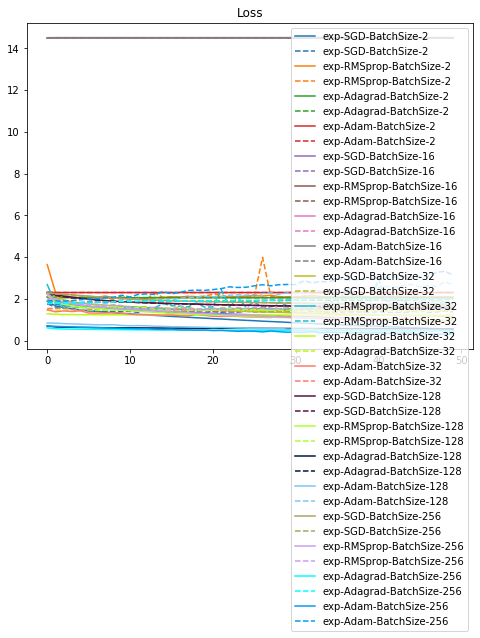

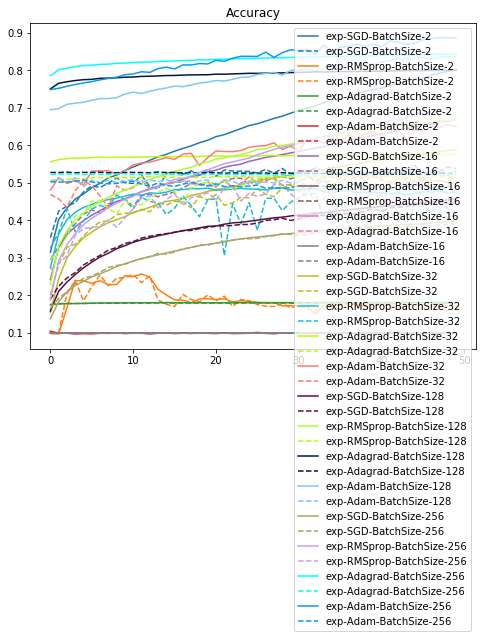

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", 
             "xkcd:yellowgreen", "xkcd:salmon", "xkcd:plum", "xkcd:lime",
             "xkcd:navy", "xkcd:lightblue", "xkcd:khaki", "xkcd:lavender",
             "xkcd:cyan","xkcd:azure"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()